In [16]:
import pandas as pd
import numpy as np
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import pickle
import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials
%matplotlib inline
import matplotlib.pyplot as plt
import sys
#sys.path.insert(1, '/content/drive/MyDrive/Credentials/')
from config import *

In [2]:
df=pd.read_csv('../data/clean/all.csv', index_col = 0)

In [3]:
df.head()

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,pop
0,Break My Soul,Beyonce,0.687,0.887,1,-5.040,0,0.0826,0.0575,0.000002,0.2700,0.853,114.941,audio_features,spotify:track:2KukL7UlQ8TdvpaA7bY3ZJ,https://api.spotify.com/v1/tracks/2KukL7UlQ8Td...,https://api.spotify.com/v1/audio-analysis/2Kuk...,278282,4,1
1,As It Was,Harry Styles,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,audio_features,spotify:track:4LRPiXqCikLlN15c3yImP7,https://api.spotify.com/v1/tracks/4LRPiXqCikLl...,https://api.spotify.com/v1/audio-analysis/4LRP...,167303,4,1
2,About Damn Time,Lizzo,0.836,0.743,10,-6.305,0,0.0656,0.0995,0.000000,0.3350,0.722,108.966,audio_features,spotify:track:1PckUlxKqWQs3RlWXVBLw3,https://api.spotify.com/v1/tracks/1PckUlxKqWQs...,https://api.spotify.com/v1/audio-analysis/1Pck...,191822,4,1
3,Running Up That Hill (A Deal With God),Kate Bush,0.625,0.533,10,-11.903,0,0.0596,0.6590,0.002660,0.0546,0.139,108.296,audio_features,spotify:track:29d0nY7TzCoi22XBqDQkiP,https://api.spotify.com/v1/tracks/29d0nY7TzCoi...,https://api.spotify.com/v1/audio-analysis/29d0...,300840,4,1
4,Staying Alive,DJ Khaled Featuring Drake & Lil Baby,0.718,0.461,4,-7.676,0,0.0797,0.0680,0.000000,0.2830,0.181,129.953,audio_features,spotify:track:0g2Bbgy7P41pFjMWJuzsf4,https://api.spotify.com/v1/tracks/0g2Bbgy7P41p...,https://api.spotify.com/v1/audio-analysis/0g2B...,178176,4,1


# Getting the numerical features

In [4]:
X = df.loc[:,'danceability':'time_signature'].drop(['mode', 'type', 'uri', 'track_href', 'analysis_url'], axis = 1)

In [5]:
X.head()

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.687,0.887,1,-5.040,0.0826,0.0575,0.000002,0.2700,0.853,114.941,278282,4
1,0.520,0.731,6,-5.338,0.0557,0.3420,0.001010,0.3110,0.662,173.930,167303,4
2,0.836,0.743,10,-6.305,0.0656,0.0995,0.000000,0.3350,0.722,108.966,191822,4
3,0.625,0.533,10,-11.903,0.0596,0.6590,0.002660,0.0546,0.139,108.296,300840,4
4,0.718,0.461,4,-7.676,0.0797,0.0680,0.000000,0.2830,0.181,129.953,178176,4


In [6]:
X.columns

Index(['danceability', 'energy', 'key', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature'],
      dtype='object')

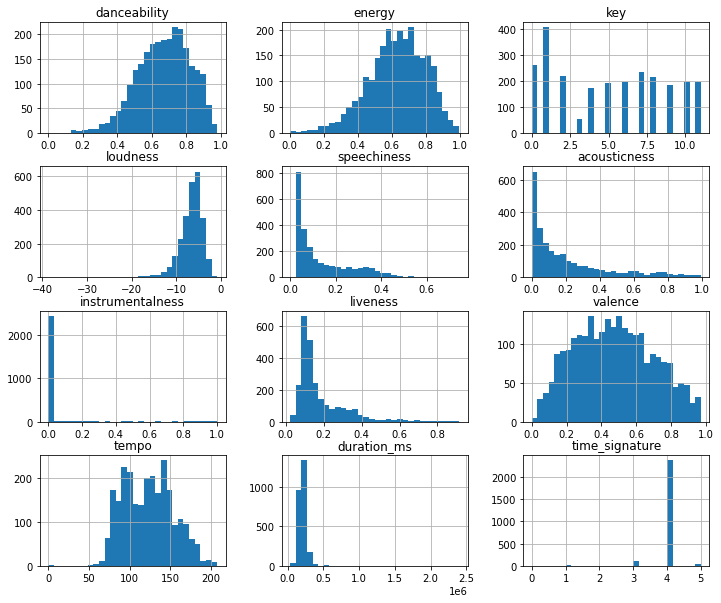

In [7]:
# Check the distribution of all columns
X.hist(bins = 30, figsize = (12, 10));

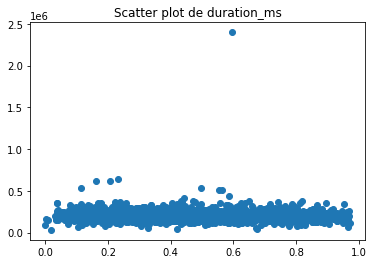

In [8]:
plt.scatter(X['valence'],X['duration_ms'])
plt.title('Scatter plot de duration_ms')
plt.show()

Since instrumentalness, duration_ms, time_signature does not give enough info, we drop it.

In [9]:
X = df.loc[:,'danceability':'time_signature'].drop(['mode', 'type', 'uri', 'track_href', 'analysis_url', 'instrumentalness', 'time_signature', 'duration_ms'], axis = 1)
X.head()

,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo
0,0.687,0.887,1,-5.040,0.0826,0.0575,0.2700,0.853,114.941
1,0.520,0.731,6,-5.338,0.0557,0.3420,0.3110,0.662,173.930
2,0.836,0.743,10,-6.305,0.0656,0.0995,0.3350,0.722,108.966
3,0.625,0.533,10,-11.903,0.0596,0.6590,0.0546,0.139,108.296
4,0.718,0.461,4,-7.676,0.0797,0.0680,0.2830,0.181,129.953


# Scaling

In [10]:
scaler = StandardScaler().fit(X)
X_scaled= scaler.transform(X)

Saving the scaler

In [11]:
with open("../scalers/standard_scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

In [12]:
with open("../scalers/X_scaled.pkl", "wb") as file:
    pickle.dump(X_scaled, file)

In [13]:
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo
0,0.687,0.887,1,-5.040,0.0826,0.0575,0.2700,0.853,114.941
1,0.520,0.731,6,-5.338,0.0557,0.3420,0.3110,0.662,173.930
2,0.836,0.743,10,-6.305,0.0656,0.0995,0.3350,0.722,108.966
3,0.625,0.533,10,-11.903,0.0596,0.6590,0.0546,0.139,108.296
4,0.718,0.461,4,-7.676,0.0797,0.0680,0.2830,0.181,129.953


,danceability,energy,key,loudness,speechiness,acousticness,liveness,valence,tempo
0,0.111514,1.529946,-1.139763,0.572359,-0.453824,-0.651390,0.671505,1.702424,-0.259286
1,-0.975937,0.607235,0.237889,0.471542,-0.666165,0.527677,0.979480,0.845690,1.691928
2,1.081754,0.678213,1.340011,0.144395,-0.588017,-0.477328,1.159758,1.114821,-0.456925
3,-0.292211,-0.563898,1.340011,-1.749473,-0.635379,1.841437,-0.946491,-1.500233,-0.479087
4,0.313376,-0.989765,-0.313172,-0.319430,-0.476716,-0.607875,0.769156,-1.311842,0.237275


Now all features have same weight.

In [14]:
K = range(2, 21)
inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} neighbours! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)
    filename = "../models/kmeans_" + str(k) + ".pickle" # Path with filename
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))



Training a K-Means model with 2 neighbours! 

Initialization complete
Iteration 0, inertia 35717.85975749481.
Iteration 1, inertia 19294.959984118566.
Iteration 2, inertia 19138.030344946255.
Iteration 3, inertia 19117.677692005353.
Iteration 4, inertia 19116.15181005341.
Iteration 5, inertia 19115.815467681212.
Iteration 6, inertia 19115.40181223608.
Iteration 7, inertia 19115.21424822712.
Converged at iteration 7: center shift 5.692830903655327e-05 within tolerance 9.999999999999987e-05.
Initialization complete
Iteration 0, inertia 31027.562553162355.
Iteration 1, inertia 20022.525283420197.
Iteration 2, inertia 19639.88803168704.
Iteration 3, inertia 19432.39289214358.
Iteration 4, inertia 19350.908213660776.
Iteration 5, inertia 19299.981858914805.
Iteration 6, inertia 19265.110186297115.
Iteration 7, inertia 19235.140580942134.
Iteration 8, inertia 19213.99493991631.
Iteration 9, inertia 19196.644788845002.
Iteration 10, inertia 19180.46157513931.
Iteration 11, inertia 19161.50683

Training a K-Means model with 3 neighbours! 

Initialization complete
Iteration 0, inertia 27231.74191643308.
Iteration 1, inertia 17854.09924585408.
Iteration 2, inertia 17647.78840247792.
Iteration 3, inertia 17606.440284940312.
Iteration 4, inertia 17587.835775725936.
Iteration 5, inertia 17573.632849112793.
Iteration 6, inertia 17556.52048462584.
Iteration 7, inertia 17540.457411087602.
Iteration 8, inertia 17523.71181935562.
Iteration 9, inertia 17505.721101513653.
Iteration 10, inertia 17487.107149757896.
Iteration 11, inertia 17472.07117398756.
Iteration 12, inertia 17458.863532356918.
Iteration 13, inertia 17452.036076354438.
Iteration 14, inertia 17448.8700706522.
Iteration 15, inertia 17447.199757665883.
Iteration 16, inertia 17446.42089748679.
Iteration 17, inertia 17445.149425052154.
Iteration 18, inertia 17444.539366510035.
Iteration 19, inertia 17444.21563507933.
Iteration 20, inertia 17444.122377904845.
Converged at iteration 20: center shift 1.3910729725709096e-05 withi

Training a K-Means model with 4 neighbours! 

Initialization complete
Iteration 0, inertia 22497.02431470736.
Iteration 1, inertia 16431.68587210851.
Iteration 2, inertia 16126.31475014516.
Iteration 3, inertia 16038.458016588927.
Iteration 4, inertia 15981.007817834321.
Iteration 5, inertia 15944.658294638091.
Iteration 6, inertia 15927.546047632812.
Iteration 7, inertia 15915.699316180768.
Iteration 8, inertia 15907.538462025486.
Iteration 9, inertia 15900.772053112718.
Iteration 10, inertia 15897.453719087838.
Iteration 11, inertia 15895.621210802361.
Iteration 12, inertia 15894.458987275064.
Iteration 13, inertia 15893.41875041879.
Iteration 14, inertia 15893.054399856723.
Iteration 15, inertia 15892.791147038524.
Iteration 16, inertia 15892.472985405686.
Converged at iteration 16: center shift 4.183924180315251e-05 within tolerance 9.999999999999987e-05.
Initialization complete
Iteration 0, inertia 25057.198057870923.
Iteration 1, inertia 17929.01418119485.
Iteration 2, inertia 17

Iteration 0, inertia 22941.335722232885.
Iteration 1, inertia 16526.51222070461.
Iteration 2, inertia 16254.529791707864.
Iteration 3, inertia 16123.989820549119.
Iteration 4, inertia 16041.516645244068.
Iteration 5, inertia 16003.154051142465.
Iteration 6, inertia 15967.513851251118.
Iteration 7, inertia 15941.41494995397.
Iteration 8, inertia 15926.952691300696.
Iteration 9, inertia 15914.990299771718.
Iteration 10, inertia 15907.29032747875.
Iteration 11, inertia 15902.298447507972.
Iteration 12, inertia 15899.122988647086.
Iteration 13, inertia 15895.230839705448.
Iteration 14, inertia 15892.985636726586.
Iteration 15, inertia 15891.671116281523.
Iteration 16, inertia 15890.06104460777.
Iteration 17, inertia 15889.308517311089.
Iteration 18, inertia 15888.830182385896.
Iteration 19, inertia 15888.554626482333.
Iteration 20, inertia 15888.40314617084.
Converged at iteration 20: center shift 6.426912510257412e-05 within tolerance 9.999999999999987e-05.
Initialization complete
Iterati

Iteration 23, inertia 15180.971625804568.
Iteration 24, inertia 15164.441198362321.
Iteration 25, inertia 15152.400482899293.
Iteration 26, inertia 15140.596106880936.
Iteration 27, inertia 15125.876945920296.
Iteration 28, inertia 15113.730423694766.
Iteration 29, inertia 15106.252975251977.
Iteration 30, inertia 15101.96718364381.
Iteration 31, inertia 15097.345965936915.
Iteration 32, inertia 15093.489855440132.
Iteration 33, inertia 15090.552247981755.
Iteration 34, inertia 15087.128100411099.
Iteration 35, inertia 15084.067067246484.
Iteration 36, inertia 15082.509395470095.
Iteration 37, inertia 15081.94052804915.
Iteration 38, inertia 15081.061104489827.
Iteration 39, inertia 15080.533787062328.
Iteration 40, inertia 15079.910788335428.
Iteration 41, inertia 15078.991493706666.
Iteration 42, inertia 15077.90995349792.
Iteration 43, inertia 15075.006285744588.
Iteration 44, inertia 15072.74923526915.
Iteration 45, inertia 15070.904065583714.
Iteration 46, inertia 15068.9478611272

Iteration 1, inertia 15590.655495866033.
Iteration 2, inertia 15310.3114262149.
Iteration 3, inertia 15168.518803462606.
Iteration 4, inertia 15054.353577685772.
Iteration 5, inertia 14948.326437287866.
Iteration 6, inertia 14877.733247572407.
Iteration 7, inertia 14835.995606809802.
Iteration 8, inertia 14807.216613786428.
Iteration 9, inertia 14786.391660542238.
Iteration 10, inertia 14770.171767271255.
Iteration 11, inertia 14756.612888466392.
Iteration 12, inertia 14748.924228374955.
Iteration 13, inertia 14744.405015214446.
Iteration 14, inertia 14739.776855253658.
Iteration 15, inertia 14736.27261599499.
Iteration 16, inertia 14733.717529914458.
Iteration 17, inertia 14732.660740101397.
Iteration 18, inertia 14732.274010110472.
Iteration 19, inertia 14732.114135954107.
Iteration 20, inertia 14732.029246727514.
Iteration 21, inertia 14731.927518965309.
Iteration 22, inertia 14731.598210030123.
Iteration 23, inertia 14731.363065759824.
Converged at iteration 23: center shift 8.7403

Iteration 32, inertia 14056.049904664284.
Iteration 33, inertia 14052.372133262525.
Iteration 34, inertia 14048.23569681523.
Iteration 35, inertia 14044.133723842837.
Iteration 36, inertia 14040.378631784522.
Iteration 37, inertia 14034.978189036246.
Iteration 38, inertia 14030.681276822186.
Iteration 39, inertia 14028.031585818886.
Iteration 40, inertia 14024.863284588719.
Iteration 41, inertia 14020.790867108562.
Iteration 42, inertia 14017.40755190975.
Iteration 43, inertia 14015.043902806676.
Iteration 44, inertia 14013.697302373148.
Iteration 45, inertia 14012.746543336742.
Iteration 46, inertia 14012.265511221836.
Iteration 47, inertia 14012.022468063074.
Iteration 48, inertia 14011.886239949756.
Iteration 49, inertia 14011.760061093835.
Iteration 50, inertia 14011.636382619301.
Iteration 51, inertia 14011.491439119856.
Iteration 52, inertia 14011.322565590515.
Iteration 53, inertia 14011.105347655062.
Iteration 54, inertia 14010.971847892255.
Converged at iteration 54: center sh

Iteration 0, inertia 22563.208648172687.
Iteration 1, inertia 15159.152288346528.
Iteration 2, inertia 14613.604622304667.
Iteration 3, inertia 14337.254506816455.
Iteration 4, inertia 14224.340730741904.
Iteration 5, inertia 14158.419709106136.
Iteration 6, inertia 14128.791248768344.
Iteration 7, inertia 14115.41283983881.
Iteration 8, inertia 14106.002510670449.
Iteration 9, inertia 14100.533866726717.
Iteration 10, inertia 14096.898275021844.
Iteration 11, inertia 14094.700863387774.
Iteration 12, inertia 14092.42507282203.
Iteration 13, inertia 14091.218049510424.
Iteration 14, inertia 14090.211036295606.
Iteration 15, inertia 14088.646538504416.
Iteration 16, inertia 14088.028947956755.
Iteration 17, inertia 14087.721265203716.
Iteration 18, inertia 14087.621799168952.
Iteration 19, inertia 14087.546781527675.
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 20339.78966904842.
Iteration 1, inertia 15435.878166316508.
Iteration 2, inertia

Iteration 21, inertia 13437.080992327195.
Iteration 22, inertia 13428.351013642745.
Iteration 23, inertia 13423.208794133026.
Iteration 24, inertia 13420.638517503832.
Iteration 25, inertia 13419.333686257723.
Iteration 26, inertia 13418.57716958552.
Iteration 27, inertia 13418.202065756104.
Iteration 28, inertia 13417.847239337987.
Iteration 29, inertia 13417.4351429774.
Iteration 30, inertia 13417.259421938013.
Iteration 31, inertia 13417.005983960242.
Iteration 32, inertia 13416.892438001201.
Iteration 33, inertia 13416.634584889916.
Iteration 34, inertia 13416.13059046729.
Iteration 35, inertia 13415.893897307384.
Iteration 36, inertia 13415.613294488605.
Iteration 37, inertia 13415.379587430705.
Iteration 38, inertia 13415.139647198.
Iteration 39, inertia 13414.923224004373.
Iteration 40, inertia 13414.81541954503.
Iteration 41, inertia 13414.734975095753.
Iteration 42, inertia 13414.641861875476.
Converged at iteration 42: center shift 7.38057279698669e-05 within tolerance 9.9999

Training a K-Means model with 8 neighbours! 

Initialization complete
Iteration 0, inertia 16997.33808259926.
Iteration 1, inertia 14085.877084521175.
Iteration 2, inertia 13748.495417495093.
Iteration 3, inertia 13507.06608667488.
Iteration 4, inertia 13264.294106275906.
Iteration 5, inertia 13071.393209699449.
Iteration 6, inertia 12949.591104098072.
Iteration 7, inertia 12868.753397004471.
Iteration 8, inertia 12808.025420423166.
Iteration 9, inertia 12750.46560972701.
Iteration 10, inertia 12696.90590694829.
Iteration 11, inertia 12672.049605059758.
Iteration 12, inertia 12658.265973336718.
Iteration 13, inertia 12652.773278438275.
Iteration 14, inertia 12648.257756905323.
Iteration 15, inertia 12644.096342498135.
Iteration 16, inertia 12638.213503192837.
Iteration 17, inertia 12634.71411872753.
Iteration 18, inertia 12632.127165638789.
Iteration 19, inertia 12628.641783945719.
Iteration 20, inertia 12624.090228172432.
Iteration 21, inertia 12620.04529878273.
Iteration 22, inertia 

Iteration 20, inertia 12772.916640155354.
Iteration 21, inertia 12741.962175225624.
Iteration 22, inertia 12727.158385494697.
Iteration 23, inertia 12718.30342138197.
Iteration 24, inertia 12708.965197551157.
Iteration 25, inertia 12699.919941212544.
Iteration 26, inertia 12692.497709122787.
Iteration 27, inertia 12686.543814058099.
Iteration 28, inertia 12679.688629896877.
Iteration 29, inertia 12671.77815404862.
Iteration 30, inertia 12667.928177858088.
Iteration 31, inertia 12662.75276370151.
Iteration 32, inertia 12651.781582826603.
Iteration 33, inertia 12639.896424417078.
Iteration 34, inertia 12632.726219895492.
Iteration 35, inertia 12627.372536942461.
Iteration 36, inertia 12623.078037382033.
Iteration 37, inertia 12620.609372990895.
Iteration 38, inertia 12618.758101176812.
Iteration 39, inertia 12613.679198706466.
Iteration 40, inertia 12611.638108402669.
Iteration 41, inertia 12610.799104571912.
Iteration 42, inertia 12610.40207028417.
Iteration 43, inertia 12610.1150523607

Iteration 31, inertia 12658.728262830613.
Iteration 32, inertia 12657.687177746378.
Iteration 33, inertia 12656.298271399668.
Iteration 34, inertia 12655.021213664846.
Iteration 35, inertia 12653.31948854827.
Iteration 36, inertia 12650.221905291539.
Iteration 37, inertia 12646.538241324004.
Iteration 38, inertia 12643.880771974593.
Iteration 39, inertia 12642.924814477803.
Iteration 40, inertia 12642.133315511202.
Iteration 41, inertia 12640.984450333975.
Iteration 42, inertia 12639.553452212767.
Iteration 43, inertia 12638.696913771964.
Iteration 44, inertia 12638.200559466928.
Iteration 45, inertia 12637.743870809774.
Iteration 46, inertia 12637.424793436327.
Iteration 47, inertia 12637.040501472515.
Iteration 48, inertia 12636.50896922725.
Iteration 49, inertia 12635.95637727324.
Iteration 50, inertia 12635.52818122159.
Iteration 51, inertia 12634.677241346906.
Iteration 52, inertia 12633.615747256616.
Iteration 53, inertia 12632.900294789211.
Iteration 54, inertia 12631.8668995889

Iteration 6, inertia 12497.718997503049.
Iteration 7, inertia 12443.531159334225.
Iteration 8, inertia 12396.497921075528.
Iteration 9, inertia 12349.351601744185.
Iteration 10, inertia 12318.072318364879.
Iteration 11, inertia 12283.593170341223.
Iteration 12, inertia 12252.731854807873.
Iteration 13, inertia 12217.68106194144.
Iteration 14, inertia 12197.377357453752.
Iteration 15, inertia 12182.373102109575.
Iteration 16, inertia 12172.903774694863.
Iteration 17, inertia 12166.341494053784.
Iteration 18, inertia 12158.605916115419.
Iteration 19, inertia 12153.49823716976.
Iteration 20, inertia 12150.708823865445.
Iteration 21, inertia 12149.718584518545.
Iteration 22, inertia 12149.198750767657.
Iteration 23, inertia 12148.505059258858.
Iteration 24, inertia 12148.157617129462.
Iteration 25, inertia 12147.903802870062.
Iteration 26, inertia 12147.721908927251.
Iteration 27, inertia 12147.65748749845.
Converged at iteration 27: center shift 9.181701556964107e-05 within tolerance 9.99

Training a K-Means model with 10 neighbours! 

Initialization complete
Iteration 0, inertia 15555.25577023589.
Iteration 1, inertia 13010.763869891824.
Iteration 2, inertia 12577.230276286566.
Iteration 3, inertia 12306.14895953781.
Iteration 4, inertia 12145.743299264026.
Iteration 5, inertia 12065.349422642816.
Iteration 6, inertia 12012.187607609254.
Iteration 7, inertia 11983.351232240688.
Iteration 8, inertia 11945.226307105355.
Iteration 9, inertia 11911.60649226907.
Iteration 10, inertia 11881.74960393812.
Iteration 11, inertia 11856.5804903029.
Iteration 12, inertia 11837.757110037835.
Iteration 13, inertia 11823.370876581259.
Iteration 14, inertia 11815.575605392647.
Iteration 15, inertia 11811.488077469803.
Iteration 16, inertia 11807.404075325017.
Iteration 17, inertia 11803.009649927213.
Iteration 18, inertia 11799.812087080669.
Iteration 19, inertia 11797.547697538974.
Iteration 20, inertia 11796.365155408394.
Iteration 21, inertia 11795.435749176659.
Iteration 22, inertia

Iteration 9, inertia 11976.458301274544.
Iteration 10, inertia 11962.349146883224.
Iteration 11, inertia 11944.589283453102.
Iteration 12, inertia 11933.336507030837.
Iteration 13, inertia 11926.805582459197.
Iteration 14, inertia 11920.183426370048.
Iteration 15, inertia 11916.999792730829.
Iteration 16, inertia 11914.3207099509.
Iteration 17, inertia 11912.312073119689.
Iteration 18, inertia 11911.059651327536.
Iteration 19, inertia 11910.34533942989.
Iteration 20, inertia 11909.85610561132.
Iteration 21, inertia 11909.26307073856.
Iteration 22, inertia 11908.70943523794.
Iteration 23, inertia 11908.142312245138.
Iteration 24, inertia 11907.618456609684.
Iteration 25, inertia 11907.416789231856.
Iteration 26, inertia 11907.362047093877.
Iteration 27, inertia 11907.181779617202.
Iteration 28, inertia 11907.106211436934.
Iteration 29, inertia 11907.00077879032.
Iteration 30, inertia 11906.779384811052.
Iteration 31, inertia 11906.361234510437.
Iteration 32, inertia 11905.999679362929.


Training a K-Means model with 11 neighbours! 

Initialization complete
Iteration 0, inertia 15299.23029480414.
Iteration 1, inertia 12683.622665505436.
Iteration 2, inertia 12155.833403238761.
Iteration 3, inertia 11913.493442623936.
Iteration 4, inertia 11765.6758362104.
Iteration 5, inertia 11693.688475959096.
Iteration 6, inertia 11653.650357645032.
Iteration 7, inertia 11627.190822943714.
Iteration 8, inertia 11609.43088204186.
Iteration 9, inertia 11591.033856779248.
Iteration 10, inertia 11575.016045500319.
Iteration 11, inertia 11562.461630526886.
Iteration 12, inertia 11545.568165974402.
Iteration 13, inertia 11532.121235457598.
Iteration 14, inertia 11519.705701889297.
Iteration 15, inertia 11511.653978278431.
Iteration 16, inertia 11502.940964672869.
Iteration 17, inertia 11490.25319118743.
Iteration 18, inertia 11480.932219678605.
Iteration 19, inertia 11475.188054074944.
Iteration 20, inertia 11465.677114807757.
Iteration 21, inertia 11459.055544359135.
Iteration 22, inerti

Iteration 1, inertia 12193.621535853747.
Iteration 2, inertia 11866.562525223677.
Iteration 3, inertia 11734.29658904422.
Iteration 4, inertia 11673.412844260816.
Iteration 5, inertia 11642.542189056006.
Iteration 6, inertia 11624.058913549827.
Iteration 7, inertia 11611.608842938123.
Iteration 8, inertia 11601.279650858281.
Iteration 9, inertia 11584.703726161575.
Iteration 10, inertia 11566.221693136009.
Iteration 11, inertia 11546.100930785846.
Iteration 12, inertia 11531.042750498853.
Iteration 13, inertia 11524.127795977101.
Iteration 14, inertia 11517.397185248496.
Iteration 15, inertia 11507.7011501.
Iteration 16, inertia 11499.108091876587.
Iteration 17, inertia 11491.75833257928.
Iteration 18, inertia 11485.103664783215.
Iteration 19, inertia 11478.350407490134.
Iteration 20, inertia 11471.868428699456.
Iteration 21, inertia 11468.030840065056.
Iteration 22, inertia 11464.090090353277.
Iteration 23, inertia 11459.590931971312.
Iteration 24, inertia 11457.26265280783.
Iteration

Iteration 23, inertia 11445.537368518839.
Converged at iteration 23: strict convergence.
Training a K-Means model with 12 neighbours! 

Initialization complete
Iteration 0, inertia 14951.436581151562.
Iteration 1, inertia 12401.664137336495.
Iteration 2, inertia 11904.195870613374.
Iteration 3, inertia 11677.19538538884.
Iteration 4, inertia 11539.739696963074.
Iteration 5, inertia 11471.688223935862.
Iteration 6, inertia 11432.99539426014.
Iteration 7, inertia 11399.450159414519.
Iteration 8, inertia 11374.975596155598.
Iteration 9, inertia 11356.441623368046.
Iteration 10, inertia 11343.04366788213.
Iteration 11, inertia 11330.294288236893.
Iteration 12, inertia 11316.251367646662.
Iteration 13, inertia 11307.233507809053.
Iteration 14, inertia 11298.739791514223.
Iteration 15, inertia 11284.805972290726.
Iteration 16, inertia 11270.170023155832.
Iteration 17, inertia 11258.93536927844.
Iteration 18, inertia 11248.002307280807.
Iteration 19, inertia 11241.335518766475.
Iteration 20, 

Iteration 18, inertia 11217.325810842578.
Iteration 19, inertia 11207.543467463007.
Iteration 20, inertia 11194.27626755559.
Iteration 21, inertia 11182.013851467642.
Iteration 22, inertia 11168.062620089615.
Iteration 23, inertia 11158.651523072705.
Iteration 24, inertia 11154.081019724177.
Iteration 25, inertia 11151.596060533342.
Iteration 26, inertia 11149.763170927055.
Iteration 27, inertia 11148.890151279407.
Iteration 28, inertia 11148.435106640314.
Iteration 29, inertia 11148.182848732853.
Iteration 30, inertia 11148.05504389615.
Converged at iteration 30: strict convergence.
Initialization complete
Iteration 0, inertia 15165.496575182939.
Iteration 1, inertia 12798.492746022854.
Iteration 2, inertia 12369.185089446291.
Iteration 3, inertia 12076.51068621306.
Iteration 4, inertia 11930.862260302192.
Iteration 5, inertia 11832.648873590082.
Iteration 6, inertia 11760.944719465502.
Iteration 7, inertia 11704.395322580322.
Iteration 8, inertia 11653.280698747883.
Iteration 9, iner

Iteration 0, inertia 14552.332433906593.
Iteration 1, inertia 12004.798002776852.
Iteration 2, inertia 11662.77657717154.
Iteration 3, inertia 11486.708158843241.
Iteration 4, inertia 11343.26402392866.
Iteration 5, inertia 11248.42730663285.
Iteration 6, inertia 11191.26945021207.
Iteration 7, inertia 11141.786118923392.
Iteration 8, inertia 11099.343226436738.
Iteration 9, inertia 11071.950005890913.
Iteration 10, inertia 11052.100912296954.
Iteration 11, inertia 11038.390021323225.
Iteration 12, inertia 11030.731382762504.
Iteration 13, inertia 11021.970808782242.
Iteration 14, inertia 11009.635953226349.
Iteration 15, inertia 11001.69432218489.
Iteration 16, inertia 10995.876696736981.
Iteration 17, inertia 10987.654835216024.
Iteration 18, inertia 10981.589563762685.
Iteration 19, inertia 10966.709320183867.
Iteration 20, inertia 10954.518792461864.
Iteration 21, inertia 10946.187537353779.
Iteration 22, inertia 10936.161276469853.
Iteration 23, inertia 10919.127833537197.
Iterati

Iteration 23, inertia 10930.454868151171.
Iteration 24, inertia 10930.35907614479.
Converged at iteration 24: strict convergence.
Initialization complete
Iteration 0, inertia 14962.851848321172.
Iteration 1, inertia 12082.293946771584.
Iteration 2, inertia 11463.778076857734.
Iteration 3, inertia 11233.345541600826.
Iteration 4, inertia 11154.029646289504.
Iteration 5, inertia 11104.830944871876.
Iteration 6, inertia 11076.84405550507.
Iteration 7, inertia 11051.43803001287.
Iteration 8, inertia 11042.163891472303.
Iteration 9, inertia 11038.618573786558.
Iteration 10, inertia 11034.528276359164.
Iteration 11, inertia 11030.534923730072.
Iteration 12, inertia 11028.326526895364.
Iteration 13, inertia 11026.737730260964.
Iteration 14, inertia 11025.127657383251.
Iteration 15, inertia 11024.097128905316.
Iteration 16, inertia 11023.228877823849.
Iteration 17, inertia 11022.66689439221.
Iteration 18, inertia 11022.035045219545.
Iteration 19, inertia 11021.834162624004.
Iteration 20, inert

Iteration 20, inertia 10765.320189490942.
Iteration 21, inertia 10762.127832147171.
Iteration 22, inertia 10759.810858104702.
Iteration 23, inertia 10758.029570089555.
Iteration 24, inertia 10756.723199166478.
Iteration 25, inertia 10753.920564776083.
Iteration 26, inertia 10751.581034882132.
Iteration 27, inertia 10749.85054086406.
Iteration 28, inertia 10748.260916838113.
Iteration 29, inertia 10747.108132711366.
Iteration 30, inertia 10745.92774209148.
Iteration 31, inertia 10745.0841122983.
Iteration 32, inertia 10744.117142941992.
Iteration 33, inertia 10742.928778531877.
Iteration 34, inertia 10740.748822793596.
Iteration 35, inertia 10738.55287239132.
Iteration 36, inertia 10737.367940628676.
Iteration 37, inertia 10735.534225967604.
Iteration 38, inertia 10734.718840902464.
Iteration 39, inertia 10734.472617269867.
Iteration 40, inertia 10734.327278092103.
Converged at iteration 40: strict convergence.
Initialization complete
Iteration 0, inertia 14392.960315422459.
Iteration 1

Iteration 0, inertia 14055.398835079983.
Iteration 1, inertia 11500.40970286596.
Iteration 2, inertia 11160.243748932184.
Iteration 3, inertia 11019.291160799325.
Iteration 4, inertia 10934.832374925176.
Iteration 5, inertia 10865.633889890822.
Iteration 6, inertia 10823.177283049494.
Iteration 7, inertia 10793.06426480807.
Iteration 8, inertia 10777.590606799193.
Iteration 9, inertia 10765.983182571244.
Iteration 10, inertia 10751.315398296869.
Iteration 11, inertia 10742.541011698728.
Iteration 12, inertia 10735.898585022365.
Iteration 13, inertia 10722.927081967408.
Iteration 14, inertia 10712.863592717324.
Iteration 15, inertia 10705.503997867243.
Iteration 16, inertia 10700.130948484335.
Iteration 17, inertia 10696.35718079114.
Iteration 18, inertia 10691.913628519018.
Iteration 19, inertia 10688.443169578084.
Iteration 20, inertia 10685.998536485433.
Iteration 21, inertia 10684.568503063127.
Iteration 22, inertia 10683.532416257185.
Iteration 23, inertia 10682.390717558112.
Itera

Iteration 7, inertia 10501.563658227195.
Iteration 8, inertia 10466.699051671225.
Iteration 9, inertia 10450.334632660572.
Iteration 10, inertia 10437.255216306881.
Iteration 11, inertia 10426.875909779745.
Iteration 12, inertia 10417.919891292715.
Iteration 13, inertia 10411.294516410215.
Iteration 14, inertia 10406.49815069389.
Iteration 15, inertia 10403.716122876916.
Iteration 16, inertia 10401.492287968715.
Iteration 17, inertia 10398.864907528401.
Iteration 18, inertia 10396.66746185047.
Iteration 19, inertia 10395.619158895746.
Iteration 20, inertia 10394.908874589228.
Iteration 21, inertia 10394.550365087756.
Iteration 22, inertia 10393.982402798427.
Iteration 23, inertia 10393.4467883502.
Iteration 24, inertia 10392.444897490175.
Iteration 25, inertia 10390.824562158798.
Iteration 26, inertia 10388.792483886979.
Iteration 27, inertia 10385.312998480913.
Iteration 28, inertia 10381.654827864115.
Iteration 29, inertia 10380.455893445589.
Iteration 30, inertia 10380.07728962642.


Iteration 21, inertia 10534.171410128512.
Iteration 22, inertia 10526.372356484924.
Iteration 23, inertia 10520.757292616849.
Iteration 24, inertia 10518.037445586042.
Iteration 25, inertia 10516.599918038963.
Iteration 26, inertia 10515.5093774013.
Iteration 27, inertia 10514.617042839962.
Iteration 28, inertia 10513.386626364842.
Iteration 29, inertia 10511.577019155062.
Iteration 30, inertia 10509.921834141194.
Iteration 31, inertia 10507.461851531905.
Iteration 32, inertia 10504.525500399155.
Iteration 33, inertia 10503.160279490696.
Iteration 34, inertia 10502.555454332698.
Iteration 35, inertia 10501.731795695567.
Iteration 36, inertia 10501.45060659586.
Iteration 37, inertia 10501.322501104538.
Iteration 38, inertia 10501.105196859931.
Iteration 39, inertia 10500.445756170853.
Iteration 40, inertia 10499.042736984296.
Iteration 41, inertia 10498.251516339678.
Iteration 42, inertia 10497.464387850243.
Iteration 43, inertia 10496.25718938869.
Iteration 44, inertia 10494.5485875570

Iteration 8, inertia 10501.822072918376.
Iteration 9, inertia 10468.011478867116.
Iteration 10, inertia 10449.492999787013.
Iteration 11, inertia 10436.218828843339.
Iteration 12, inertia 10427.432123743893.
Iteration 13, inertia 10418.470506153028.
Iteration 14, inertia 10411.358813444745.
Iteration 15, inertia 10400.990438450903.
Iteration 16, inertia 10383.13014004392.
Iteration 17, inertia 10360.073507704124.
Iteration 18, inertia 10332.60853316414.
Iteration 19, inertia 10310.211056054002.
Iteration 20, inertia 10289.928038744789.
Iteration 21, inertia 10275.174750562173.
Iteration 22, inertia 10268.158284292307.
Iteration 23, inertia 10261.273085698802.
Iteration 24, inertia 10256.071143600895.
Iteration 25, inertia 10250.809202530072.
Iteration 26, inertia 10245.424244724369.
Iteration 27, inertia 10241.358562548283.
Iteration 28, inertia 10236.333975975362.
Iteration 29, inertia 10231.960141231668.
Iteration 30, inertia 10229.186303993547.
Iteration 31, inertia 10226.9727869987

Iteration 17, inertia 10229.461272186782.
Iteration 18, inertia 10221.187908078495.
Iteration 19, inertia 10215.283181899404.
Iteration 20, inertia 10210.57973494124.
Iteration 21, inertia 10205.909768951722.
Iteration 22, inertia 10202.15356213773.
Iteration 23, inertia 10198.495871464376.
Iteration 24, inertia 10194.503063725015.
Iteration 25, inertia 10190.85168774968.
Iteration 26, inertia 10187.330903811897.
Iteration 27, inertia 10183.171990662902.
Iteration 28, inertia 10179.570005750098.
Iteration 29, inertia 10177.380048291929.
Iteration 30, inertia 10175.476754042478.
Iteration 31, inertia 10173.947208099275.
Iteration 32, inertia 10172.974783875388.
Iteration 33, inertia 10171.519311841104.
Iteration 34, inertia 10170.098664568031.
Iteration 35, inertia 10168.831134801709.
Iteration 36, inertia 10168.280912018678.
Iteration 37, inertia 10167.750150331372.
Iteration 38, inertia 10167.569513372846.
Iteration 39, inertia 10167.455852251507.
Converged at iteration 39: strict con

Iteration 6, inertia 10177.00495280135.
Iteration 7, inertia 10128.491609828965.
Iteration 8, inertia 10096.01427540597.
Iteration 9, inertia 10072.769817148124.
Iteration 10, inertia 10059.21374144964.
Iteration 11, inertia 10049.989721729233.
Iteration 12, inertia 10044.548686770715.
Iteration 13, inertia 10039.981597957933.
Iteration 14, inertia 10035.939334465598.
Iteration 15, inertia 10032.800972675399.
Iteration 16, inertia 10029.699056236701.
Iteration 17, inertia 10027.243364017038.
Iteration 18, inertia 10025.00050833334.
Iteration 19, inertia 10022.321648664216.
Iteration 20, inertia 10020.247993897117.
Iteration 21, inertia 10019.501316695163.
Iteration 22, inertia 10019.089674683742.
Iteration 23, inertia 10018.24116728504.
Iteration 24, inertia 10017.520378253297.
Iteration 25, inertia 10017.418702645453.
Iteration 26, inertia 10017.38965154062.
Iteration 27, inertia 10017.349495578577.
Iteration 28, inertia 10017.24718797467.
Iteration 29, inertia 10017.206951896114.
Con

Iteration 34, inertia 10115.34041117154.
Iteration 35, inertia 10115.243307588222.
Iteration 36, inertia 10115.182906659616.
Converged at iteration 36: strict convergence.
Initialization complete
Iteration 0, inertia 12688.590074102076.
Iteration 1, inertia 10847.666459817525.
Iteration 2, inertia 10491.808110810729.
Iteration 3, inertia 10313.68980991797.
Iteration 4, inertia 10230.97945374424.
Iteration 5, inertia 10187.44313154498.
Iteration 6, inertia 10167.114654870415.
Iteration 7, inertia 10152.897027939422.
Iteration 8, inertia 10146.359958410301.
Iteration 9, inertia 10141.528168755232.
Iteration 10, inertia 10137.45366464439.
Iteration 11, inertia 10133.476352942436.
Iteration 12, inertia 10129.627870572915.
Iteration 13, inertia 10125.643913081763.
Iteration 14, inertia 10122.345810481576.
Iteration 15, inertia 10121.303215432854.
Iteration 16, inertia 10119.290493100523.
Iteration 17, inertia 10118.220681266304.
Iteration 18, inertia 10116.941423057993.
Iteration 19, inerti

Iteration 37, inertia 9799.253910263766.
Iteration 38, inertia 9799.008158273151.
Iteration 39, inertia 9798.726643240268.
Iteration 40, inertia 9798.290147604055.
Iteration 41, inertia 9798.199588495583.
Converged at iteration 41: strict convergence.
Initialization complete
Iteration 0, inertia 13754.810687327721.
Iteration 1, inertia 10774.374468209518.
Iteration 2, inertia 10405.524313225276.
Iteration 3, inertia 10266.750452067841.
Iteration 4, inertia 10184.115314019573.
Iteration 5, inertia 10121.973186661306.
Iteration 6, inertia 10078.825948597718.
Iteration 7, inertia 10048.349264247017.
Iteration 8, inertia 10019.024740647228.
Iteration 9, inertia 9999.290649353385.
Iteration 10, inertia 9981.627454028407.
Iteration 11, inertia 9962.592844036359.
Iteration 12, inertia 9941.996095381786.
Iteration 13, inertia 9925.06100043435.
Iteration 14, inertia 9912.65853674855.
Iteration 15, inertia 9902.554130699407.
Iteration 16, inertia 9891.629224105352.
Iteration 17, inertia 9880.961

Training a K-Means model with 19 neighbours! 

Initialization complete
Iteration 0, inertia 12434.176418402798.
Iteration 1, inertia 10539.154171970842.
Iteration 2, inertia 10233.590779603517.
Iteration 3, inertia 10127.292818217249.
Iteration 4, inertia 10063.260170579755.
Iteration 5, inertia 9998.373913378824.
Iteration 6, inertia 9936.198448124203.
Iteration 7, inertia 9888.53598669175.
Iteration 8, inertia 9858.947404313129.
Iteration 9, inertia 9831.75245392774.
Iteration 10, inertia 9802.277427393958.
Iteration 11, inertia 9783.002704319702.
Iteration 12, inertia 9766.669219089894.
Iteration 13, inertia 9754.445162327132.
Iteration 14, inertia 9745.32902419112.
Iteration 15, inertia 9739.206193413791.
Iteration 16, inertia 9733.377798091482.
Iteration 17, inertia 9729.436936057058.
Iteration 18, inertia 9724.268343144015.
Iteration 19, inertia 9717.553828683884.
Iteration 20, inertia 9708.890245652514.
Iteration 21, inertia 9701.503713941154.
Iteration 22, inertia 9695.58980424

Iteration 1, inertia 10521.234996005876.
Iteration 2, inertia 10149.74213591635.
Iteration 3, inertia 10005.611392044126.
Iteration 4, inertia 9939.241586204978.
Iteration 5, inertia 9896.175339814847.
Iteration 6, inertia 9864.30337569813.
Iteration 7, inertia 9843.25325885754.
Iteration 8, inertia 9826.150087985485.
Iteration 9, inertia 9813.88696330608.
Iteration 10, inertia 9802.607256317851.
Iteration 11, inertia 9791.104206734459.
Iteration 12, inertia 9782.505062848895.
Iteration 13, inertia 9774.183055943944.
Iteration 14, inertia 9769.073640211129.
Iteration 15, inertia 9763.652306480291.
Iteration 16, inertia 9761.240808994175.
Iteration 17, inertia 9759.971160846642.
Iteration 18, inertia 9759.218141014317.
Iteration 19, inertia 9758.411802787392.
Iteration 20, inertia 9757.65678371731.
Iteration 21, inertia 9756.942417029146.
Iteration 22, inertia 9756.217309726537.
Iteration 23, inertia 9755.830685446688.
Iteration 24, inertia 9755.433776144393.
Iteration 25, inertia 9755.

Iteration 35, inertia 9672.835171222829.
Iteration 36, inertia 9671.323622540052.
Iteration 37, inertia 9670.112549532867.
Iteration 38, inertia 9668.02260318677.
Iteration 39, inertia 9667.50134196449.
Iteration 40, inertia 9666.791863402777.
Iteration 41, inertia 9666.395881879902.
Iteration 42, inertia 9666.096134726631.
Iteration 43, inertia 9665.786339855376.
Iteration 44, inertia 9665.101146377763.
Iteration 45, inertia 9664.621163947404.
Iteration 46, inertia 9664.336533649657.
Iteration 47, inertia 9663.84652863999.
Iteration 48, inertia 9663.026710938206.
Iteration 49, inertia 9662.231488715764.
Iteration 50, inertia 9661.0749470122.
Iteration 51, inertia 9660.38458425165.
Iteration 52, inertia 9659.293848416097.
Iteration 53, inertia 9658.347868637762.
Iteration 54, inertia 9657.898597666499.
Iteration 55, inertia 9657.208635068835.
Iteration 56, inertia 9656.506317358497.
Iteration 57, inertia 9656.202890954495.
Iteration 58, inertia 9655.935714439169.
Iteration 59, inertia 

Iteration 29, inertia 9594.045836370615.
Iteration 30, inertia 9591.60015022448.
Iteration 31, inertia 9590.654422914307.
Iteration 32, inertia 9590.455875660558.
Iteration 33, inertia 9590.084424420404.
Iteration 34, inertia 9589.779275828922.
Iteration 35, inertia 9589.417700054524.
Iteration 36, inertia 9589.070456887064.
Iteration 37, inertia 9588.019716952393.
Iteration 38, inertia 9586.203545853828.
Iteration 39, inertia 9585.039390306942.
Iteration 40, inertia 9583.756958099393.
Iteration 41, inertia 9582.685612111361.
Iteration 42, inertia 9581.70181190607.
Iteration 43, inertia 9580.289132839118.
Iteration 44, inertia 9579.45082418431.
Iteration 45, inertia 9579.290982899838.
Iteration 46, inertia 9579.205260396127.
Converged at iteration 46: strict convergence.
Initialization complete
Iteration 0, inertia 12642.158383192795.
Iteration 1, inertia 10214.047138655798.
Iteration 2, inertia 9940.838447399437.
Iteration 3, inertia 9804.672264458817.
Iteration 4, inertia 9722.629013

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

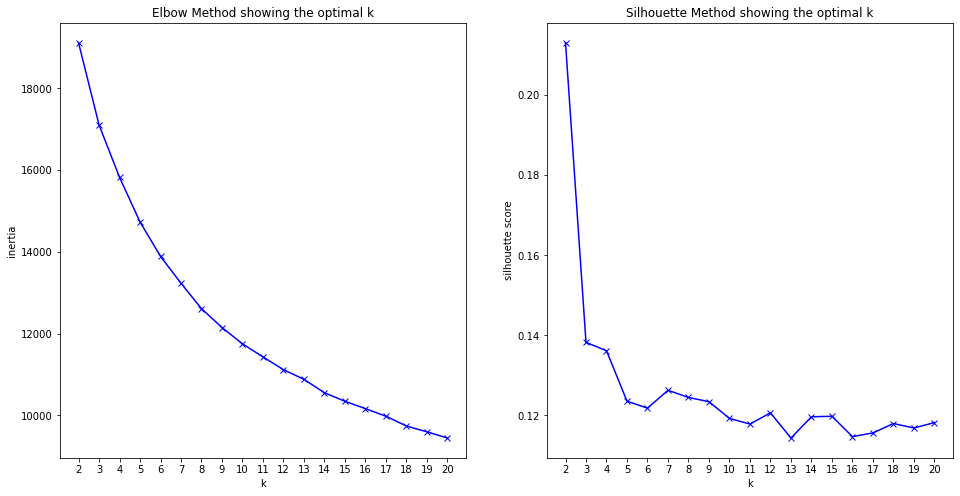

In [18]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')


In [19]:
fig.savefig('../Images/KMeans_Silhouette', transparent=True)

Though the elbow method does not show clearly the optimum K value, but the silhouette method shows K value could be 7 or 11. I would choose 7 at first and see how it goes.

In [22]:
# loadK_means_model_with7_clusters
kmeans_7 = KMeans(n_clusters=7, random_state=123)
kmeans_7.fit(X_scaled_df)

KMeans(n_clusters=7, random_state=123)

In [24]:
clusters7 = kmeans_7.predict(X_scaled_df)
#clusters
pd.Series(clusters7).value_counts().sort_index() # Number of wines in each cluster

0    499
1    435
2    180
3     44
4    391
5    355
6    636
dtype: int64

In [25]:
#X_df = pd.DataFrame(X)
df["Kmeans_7"] = clusters7



In [26]:
df[df["Kmeans_7"]==3]

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,pop,Kmeans_7
91,I'm That Girl,Beyonce,0.4440,0.12400,9,-15.794,1,0.0794,0.994,0.894000,...,0.26600,170.590,audio_features,spotify:track:4snTBis7x7nafci0uGLRCA,https://api.spotify.com/v1/tracks/4snTBis7x7na...,https://api.spotify.com/v1/audio-analysis/4snT...,182445,4,1,3
161,WFM,Realestk,0.4370,0.18400,1,-17.667,1,0.0313,0.720,0.002530,...,0.24700,80.088,audio_features,spotify:track:1DNA2z7Txysjk3cNz2nDLm,https://api.spotify.com/v1/tracks/1DNA2z7Txysj...,https://api.spotify.com/v1/audio-analysis/1DNA...,136000,4,0,3
200,Blue Note$ II,Meek Mill Featuring Lil Uzi Vert,0.1580,0.00128,5,-38.725,1,0.0492,0.992,0.964000,...,0.04830,73.561,audio_features,spotify:track:4Dv3Po2YftXtigwMTxmbGf,https://api.spotify.com/v1/tracks/4Dv3Po2YftXt...,https://api.spotify.com/v1/audio-analysis/4Dv3...,175560,4,0,3
208,Love All,Drake Featuring JAY-Z,0.4210,0.13100,0,-18.435,1,0.0382,0.952,0.004530,...,0.12000,137.446,audio_features,spotify:track:6CcJMwBtXByIz4zQLzFkKc,https://api.spotify.com/v1/tracks/6CcJMwBtXByI...,https://api.spotify.com/v1/audio-analysis/6CcJ...,291796,4,0,3
327,Billie Bossa Nova,Billie Eilish,0.5990,0.12800,10,-17.261,1,0.1090,0.974,0.121000,...,0.36700,159.679,audio_features,spotify:track:4HOryCnbme0zBnF8LWij3f,https://api.spotify.com/v1/tracks/4HOryCnbme0z...,https://api.spotify.com/v1/audio-analysis/4HOr...,244221,4,0,3
333,My Future,Billie Eilish,0.4030,0.15900,1,-16.728,0,0.1040,0.961,0.012100,...,0.03810,72.380,audio_features,spotify:track:5XsAal7ZcWg1I5T4NcRjkv,https://api.spotify.com/v1/tracks/5XsAal7ZcWg1...,https://api.spotify.com/v1/audio-analysis/5XsA...,234761,4,0,3
380,Rise!,"Tyler, The Creator Featuring Daisy World",0.4830,0.12900,5,-20.149,0,0.0349,0.947,0.145000,...,0.20300,137.350,audio_features,spotify:track:51Grh1RyUDcMBbpuyUIUHI,https://api.spotify.com/v1/tracks/51Grh1RyUDcM...,https://api.spotify.com/v1/audio-analysis/51Gr...,161929,3,0,3
444,Lady,Brett Young,0.5390,0.16000,3,-13.285,1,0.0329,0.881,0.000268,...,0.32200,81.446,audio_features,spotify:track:3t5OV1asJHmOlf23T08CLv,https://api.spotify.com/v1/tracks/3t5OV1asJHmO...,https://api.spotify.com/v1/audio-analysis/3t5O...,183533,4,0,3
585,Lo Vas A Olvidar,Billie Eilish & ROSALIA,0.3430,0.24300,4,-14.660,0,0.0777,0.721,0.001980,...,0.03200,135.154,audio_features,spotify:track:0psS4i5YooJrXfDnGvWRLi,https://api.spotify.com/v1/tracks/0psS4i5YooJr...,https://api.spotify.com/v1/audio-analysis/0psS...,203464,4,0,3
622,"Let It Snow, Let It Snow, Let It Snow",Dean Martin,0.4510,0.24000,1,-14.014,1,0.0351,0.912,0.000002,...,0.70100,134.009,audio_features,spotify:track:2uFaJJtFpPDc5Pa95XzTvg,https://api.spotify.com/v1/tracks/2uFaJJtFpPDc...,https://api.spotify.com/v1/audio-analysis/2uFa...,117147,4,0,3


In [ ]:
kmeans.inertia_

In [27]:
# loadK_means_model_with11_clusters
kmeans_11 = KMeans(n_clusters=11, random_state=123)
kmeans_11.fit(X_scaled_df)

KMeans(n_clusters=11, random_state=123)

In [28]:
clusters11 = kmeans_11.predict(X_scaled_df)
#clusters
pd.Series(clusters11).value_counts().sort_index() # Number of wines in each cluster

0     298
1     283
2     263
3     300
4     181
5     136
6     335
7     293
8      12
9     211
10    228
dtype: int64

In [29]:
#X_df = pd.DataFrame(X)
df["Kmeans_11"] = clusters11

In [31]:
df[df["Kmeans_11"]==8]

,song,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,pop,Kmeans_7,Kmeans_11
200,Blue Note$ II,Meek Mill Featuring Lil Uzi Vert,0.1580,0.00128,5,-38.725,1,0.0492,0.992,0.964000,...,73.561,audio_features,spotify:track:4Dv3Po2YftXtigwMTxmbGf,https://api.spotify.com/v1/tracks/4Dv3Po2YftXt...,https://api.spotify.com/v1/audio-analysis/4Dv3...,175560,4,0,3,8
802,Dolly,Lil Tecca & Lil Uzi Vert,0.3700,0.00760,4,-33.663,1,0.0384,0.995,0.910000,...,62.668,audio_features,spotify:track:3NbAsIxDL0fVgNuCLD152P,https://api.spotify.com/v1/tracks/3NbAsIxDL0fV...,https://api.spotify.com/v1/audio-analysis/3NbA...,176518,4,0,3,8
1207,223's,YNW Melly & 9lokknine,0.1600,0.97000,6,-28.718,1,0.3840,0.571,0.830000,...,61.401,audio_features,spotify:track:6tCcwt3CqAIYWfQt3irfRR,https://api.spotify.com/v1/tracks/6tCcwt3CqAIY...,https://api.spotify.com/v1/audio-analysis/6tCc...,32000,3,0,3,8
1394,La La Land,Bryce Vine Featuring YG,0.4140,0.16100,7,-22.320,0,0.0318,0.883,0.000223,...,159.375,audio_features,spotify:track:5ihS6UUlyQAfmp48eSkxuQ,https://api.spotify.com/v1/tracks/5ihS6UUlyQAf...,https://api.spotify.com/v1/audio-analysis/5ihS...,199493,4,0,3,8
1535,Listen Before I Go,Billie Eilish,0.3190,0.05610,0,-23.023,1,0.0450,0.935,0.003840,...,79.764,audio_features,spotify:track:0tMSssfxAL2oV8Vri0mFHE,https://api.spotify.com/v1/tracks/0tMSssfxAL2o...,https://api.spotify.com/v1/audio-analysis/0tMS...,242652,3,0,3,8
1642,Testimony,Kodak Black,0.4280,0.01450,2,-31.154,1,0.0470,0.994,0.895000,...,128.522,audio_features,spotify:track:1NgM2SEuhj7pAzeVTF6Oe5,https://api.spotify.com/v1/tracks/1NgM2SEuhj7p...,https://api.spotify.com/v1/audio-analysis/1NgM...,164000,4,0,3,8
1699,Negative Energy,Trippie Redd Featuring Kodie Shane,0.1420,0.07400,8,-30.556,1,0.0448,0.948,0.903000,...,141.910,audio_features,spotify:track:0AHZtMbyjHWhtWmqE8Egv7,https://api.spotify.com/v1/tracks/0AHZtMbyjHWh...,https://api.spotify.com/v1/audio-analysis/0AHZ...,176250,4,0,3,8
1863,Elevate,Drake,0.1430,0.07300,2,-28.019,1,0.0427,0.939,0.835000,...,141.011,audio_features,spotify:track:17mJsiuoDPQwVfgk8G9Nxj,https://api.spotify.com/v1/tracks/17mJsiuoDPQw...,https://api.spotify.com/v1/audio-analysis/17mJ...,163000,4,0,3,8
1882,Peak,Drake,0.0971,0.00295,1,-37.887,1,0.0494,0.978,0.924000,...,74.576,audio_features,spotify:track:5lXpowQ714d5VWxjdFLfi7,https://api.spotify.com/v1/tracks/5lXpowQ714d5...,https://api.spotify.com/v1/audio-analysis/5lXp...,156000,3,0,3,8
2016,Focus,H.E.R.,0.1070,0.23600,11,-26.609,0,0.0579,0.937,0.013800,...,80.628,audio_features,spotify:track:3kxUcpFquT4ZdvJC1Nyu5q,https://api.spotify.com/v1/tracks/3kxUcpFquT4Z...,https://api.spotify.com/v1/audio-analysis/3kxU...,162407,4,0,3,8
